In [2]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv('../csvki/JezPrzymClass.csv')

In [4]:
dataset.shape

(59, 6)

In [5]:
dataset.head(5)

,Id,Keratella_cochlearis_tecta,Polyarthra_vulgaris,Pompholyx_sulcata,Mesocyclops_leuckarti,Lake_class
0,1,0.03,0.0,0.0,0.00,Oligohaline
1,2,0.08,0.0,0.0,0.09,Oligohaline
2,3,0.06,0.0,0.0,0.08,Oligohaline
3,4,0.04,0.0,0.0,0.14,Oligohaline
4,5,0.02,0.0,0.0,0.00,Oligohaline


In [6]:
dataset.describe()

,Id,Keratella_cochlearis_tecta,Polyarthra_vulgaris,Pompholyx_sulcata,Mesocyclops_leuckarti
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,30.000000,0.059831,0.000508,0.002203,0.066271
std,17.175564,0.069220,0.002216,0.007208,0.119624
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,15.500000,0.020000,0.000000,0.000000,0.000000
50%,30.000000,0.040000,0.000000,0.000000,0.000000
75%,44.500000,0.070000,0.000000,0.000000,0.090000
max,59.000000,0.320000,0.010000,0.030000,0.580000


In [7]:
dataset.groupby('Lake_class').size()

Lake_class
Freshwater             29
Freshwater-isolated     5
Mesohaline             10
Oligohaline            15
dtype: int64

In [8]:
feature_columns = ['Keratella_cochlearis_tecta', 'Polyarthra_vulgaris', 'Pompholyx_sulcata', 'Mesocyclops_leuckarti']
X = dataset[feature_columns].values
y = dataset['Lake_class'].values

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

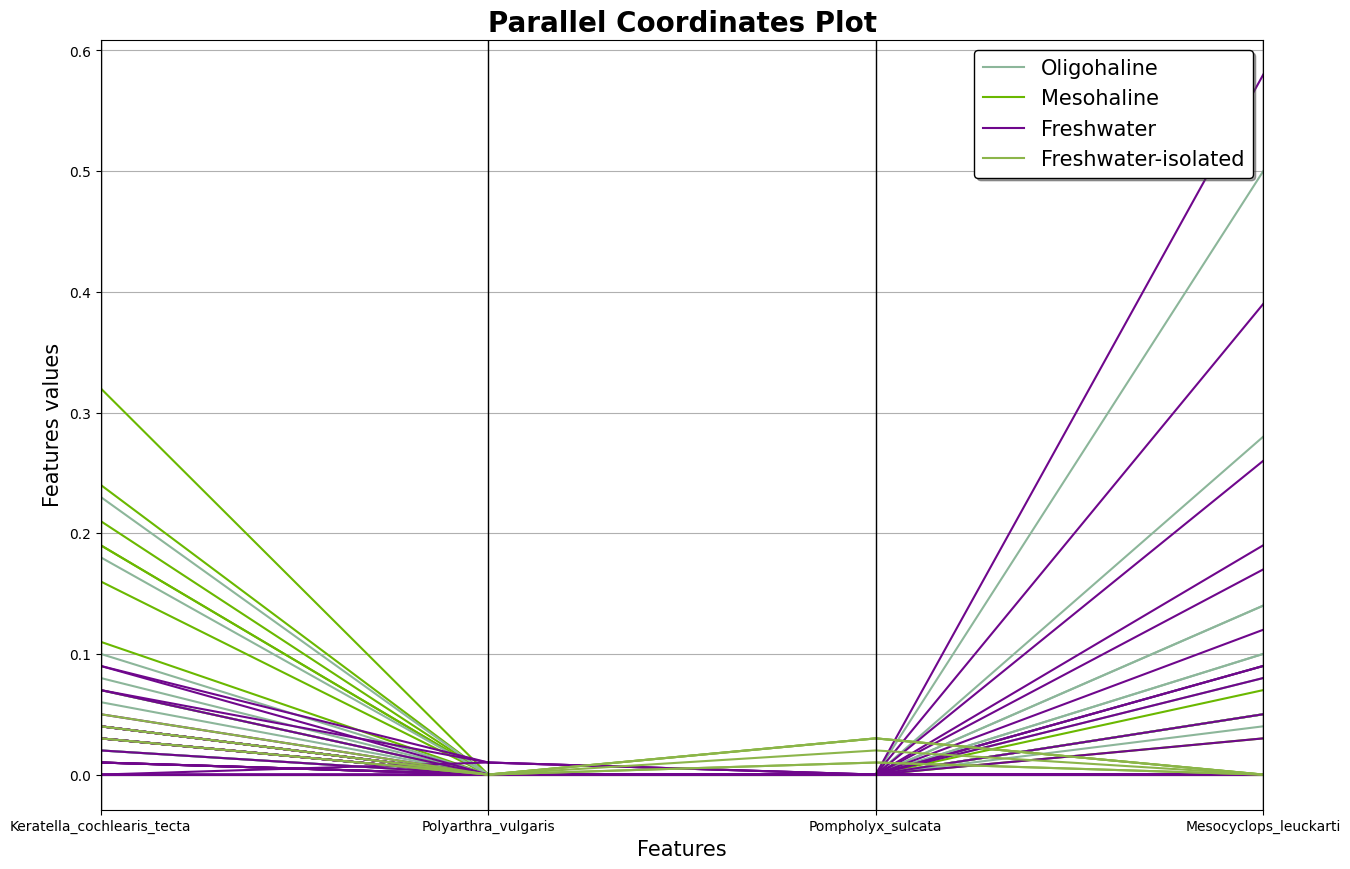

In [11]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "Lake_class")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

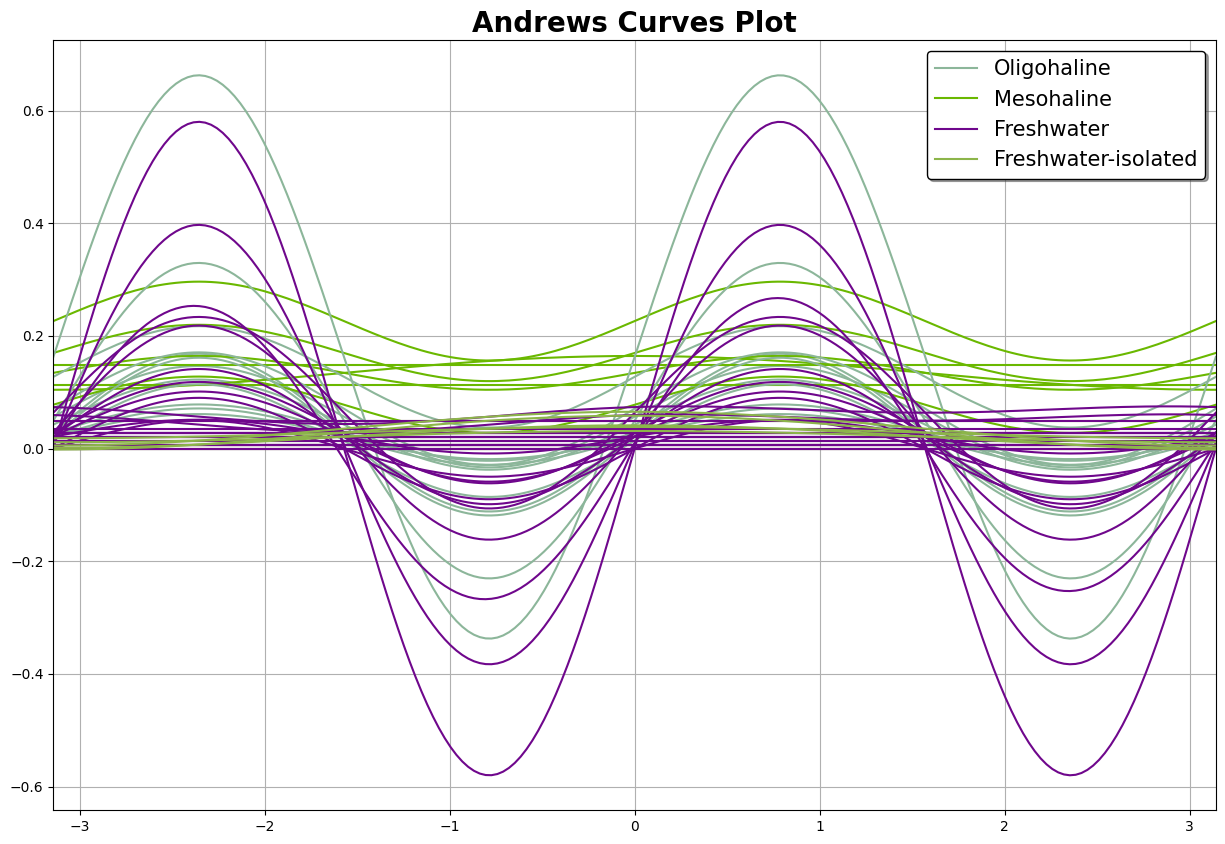

In [12]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset.drop("Id", axis=1), "Lake_class")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

<Figure size 640x480 with 0 Axes>

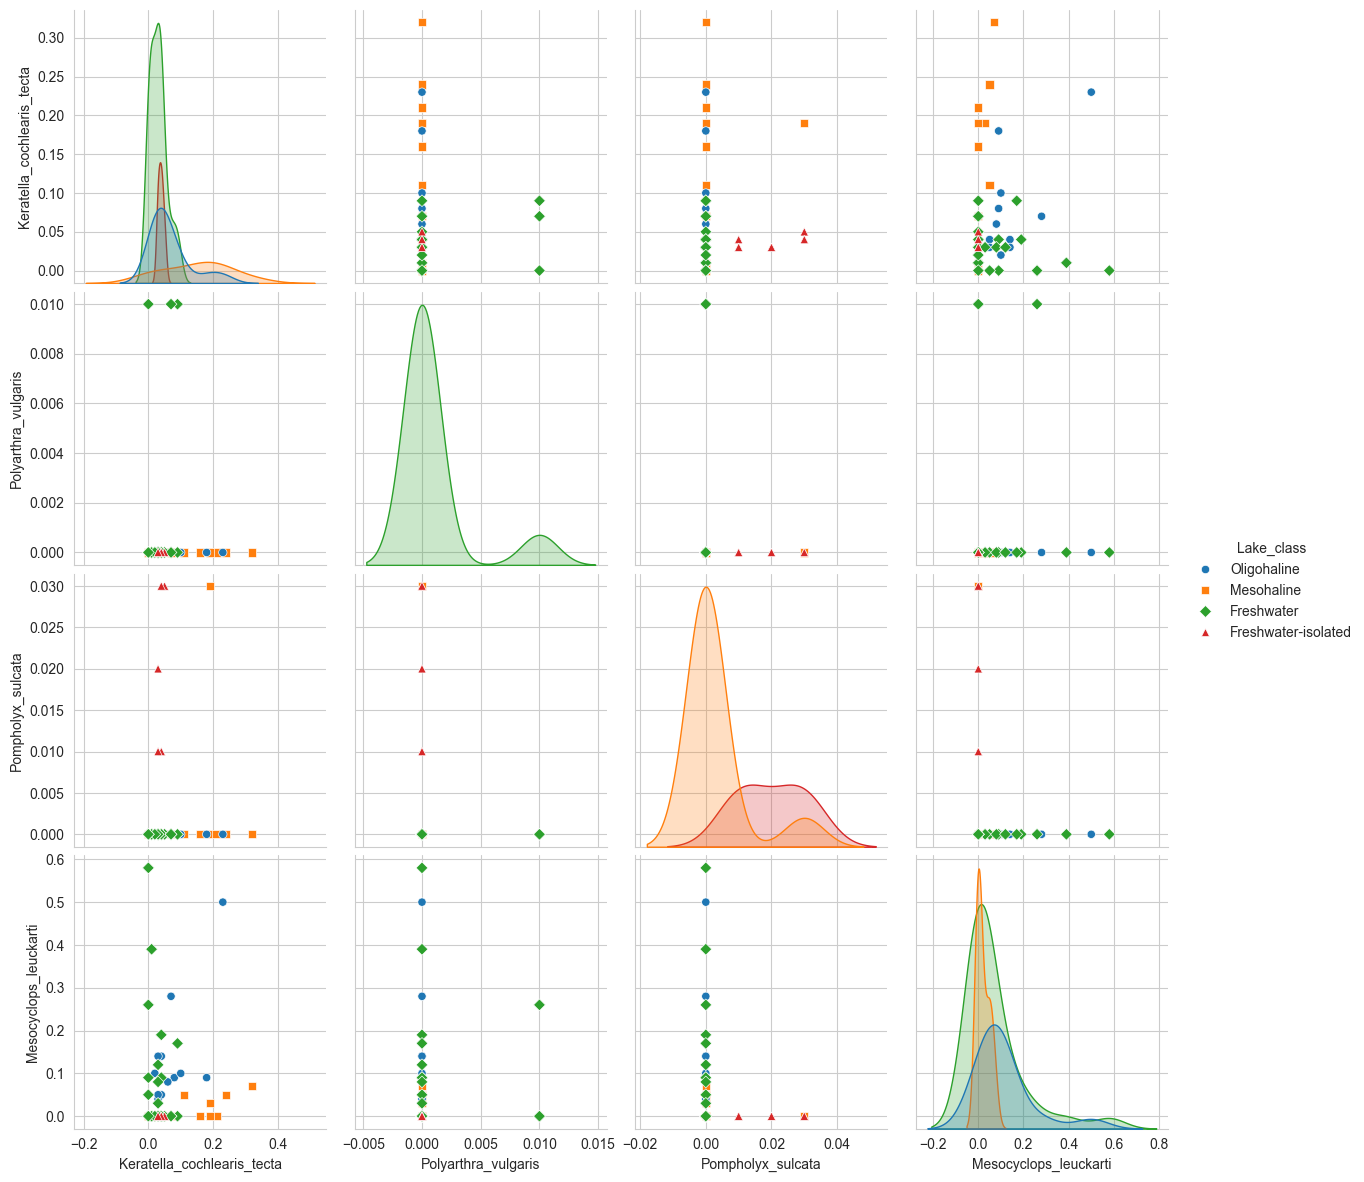

In [36]:
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue = "Lake_class", height=3, markers=["o", "s", "D", "^"])
plt.show()

<Figure size 640x480 with 0 Axes>

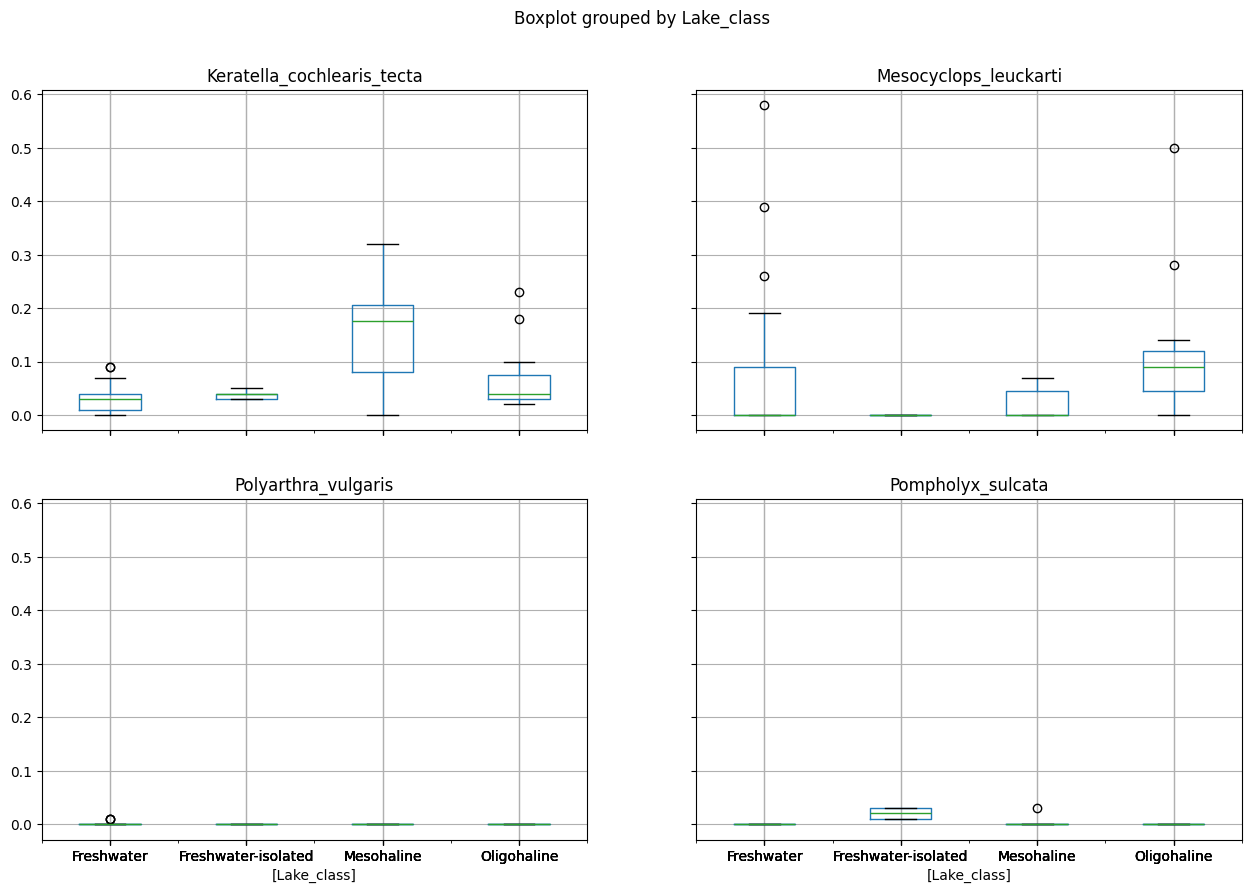

In [14]:
plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Lake_class", figsize=(15,10))
plt.show()

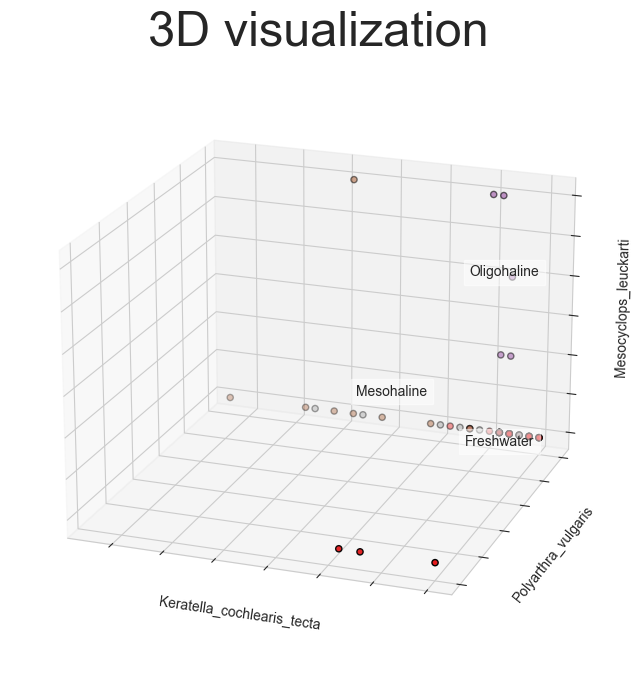

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=20, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k')
for name, label in [('Freshwater', 0), ('Oligohaline', 1), ('Mesohaline', 2)]:
        ax.text3D(X[y == label, 0].mean(),
                  X[y == label, 1].mean(),
                  X[y == label, 2].mean(), name,
                  horizontalalignment='center',
                  bbox=dict(alpha=.5, edgecolor='w', facecolor='w'), size=10)
    
ax.set_title("3D visualization", fontsize=35)
ax.set_xlabel("Keratella_cochlearis_tecta", fontsize=10)
ax.xaxis.set_ticklabels([])
ax.set_ylabel("Polyarthra_vulgaris", fontsize=10)
ax.yaxis.set_ticklabels([])
ax.set_zlabel("Mesocyclops_leuckarti", fontsize=10)
ax.zaxis.set_ticklabels([])

plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

classifier.fit(X_train, y_train)

y_pred= classifier.predict(X_test)

In [30]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6, 0, 1],
       [1, 1, 0],
       [3, 0, 0]], dtype=int64)

In [31]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 58.33 %.


##### trochę słabo

In [33]:
k_list = list(range(1, 30, 2))

cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=4, scoring='accuracy')
    cv_scores.append(scores.mean())


<Figure size 640x480 with 0 Axes>

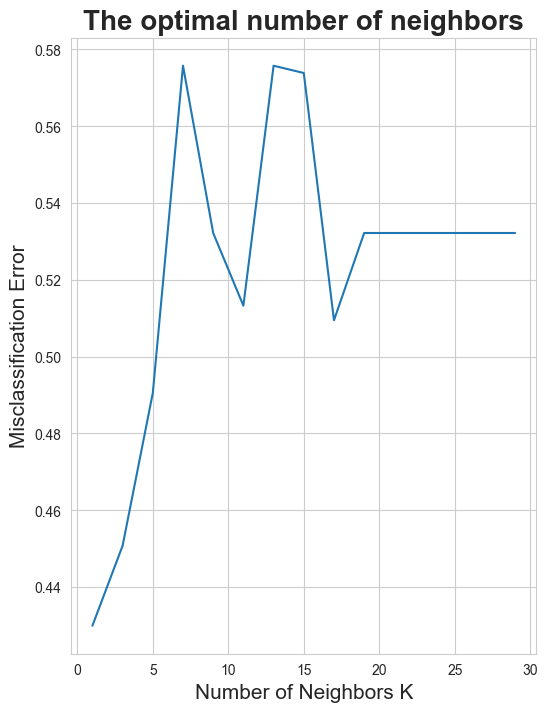

In [34]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(6,8))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [35]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 1.
